# What drives the price of a car?

![](Input/Data/practical_application_II_starter/images/kurt.jpeg)

This notebook follows the CRISP-DM framework to explore a used car dataset, build predictive models, and generate business recommendations for a used car dealership.

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM![](crisp.png)  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

**Goal:** Help a used car dealership understand what features influence used car prices, so they can make smarter inventory and pricing decisions.

**Target Variable:** `price`

**Key Questions:**
- Do newer cars sell for more?
- Does lower mileage increase value?
- What brands or features are most valuable?

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='whitegrid')

df = pd.read_csv('vehicles.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

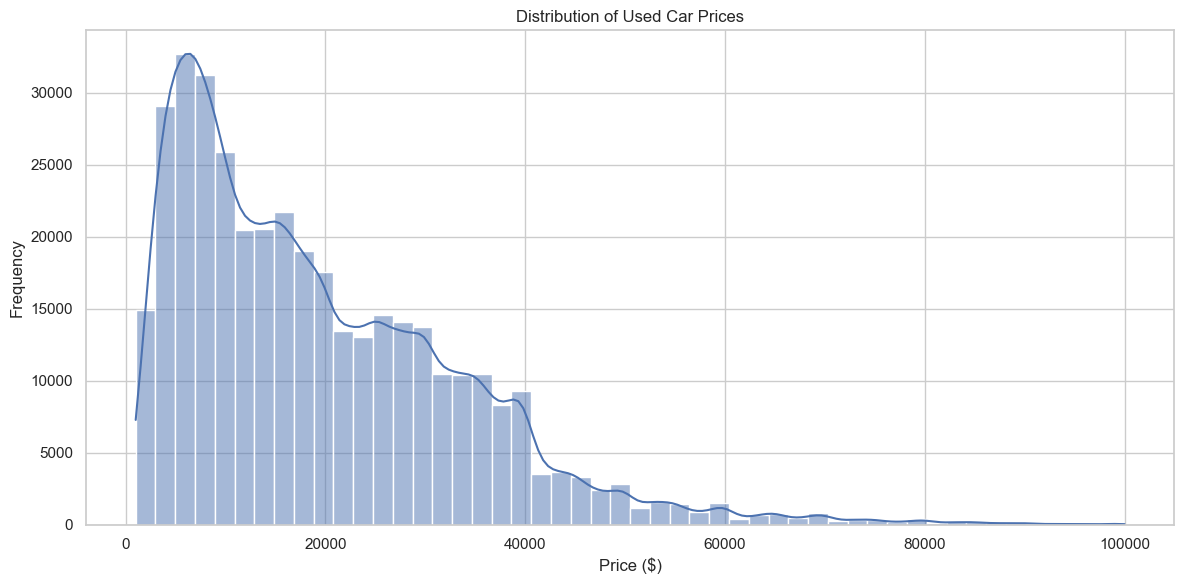

In [15]:
df_filtered = df[(df['price'] > 1000) & (df['price'] < 100000)]
plt.figure(figsize=(12, 6))
sns.histplot(df_filtered['price'], bins=50, kde=True)
plt.title('Distribution of Used Car Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

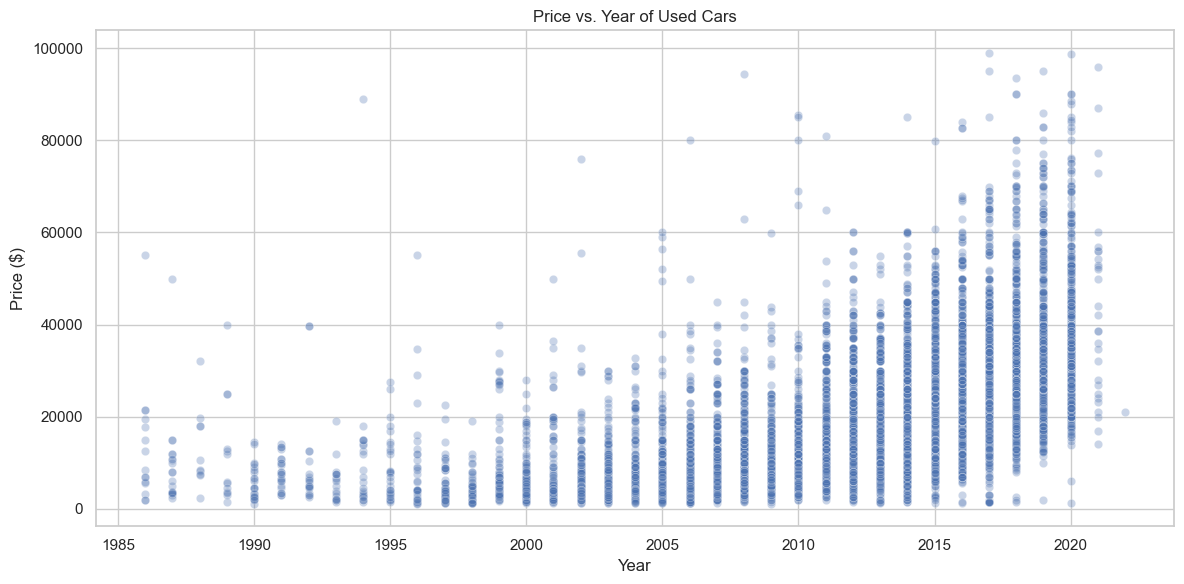

In [16]:
df_year = df_filtered[df_filtered['year'].notnull() & (df_filtered['year'] > 1985)]
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_year.sample(10000), x='year', y='price', alpha=0.3)
plt.title('Price vs. Year of Used Cars')
plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()

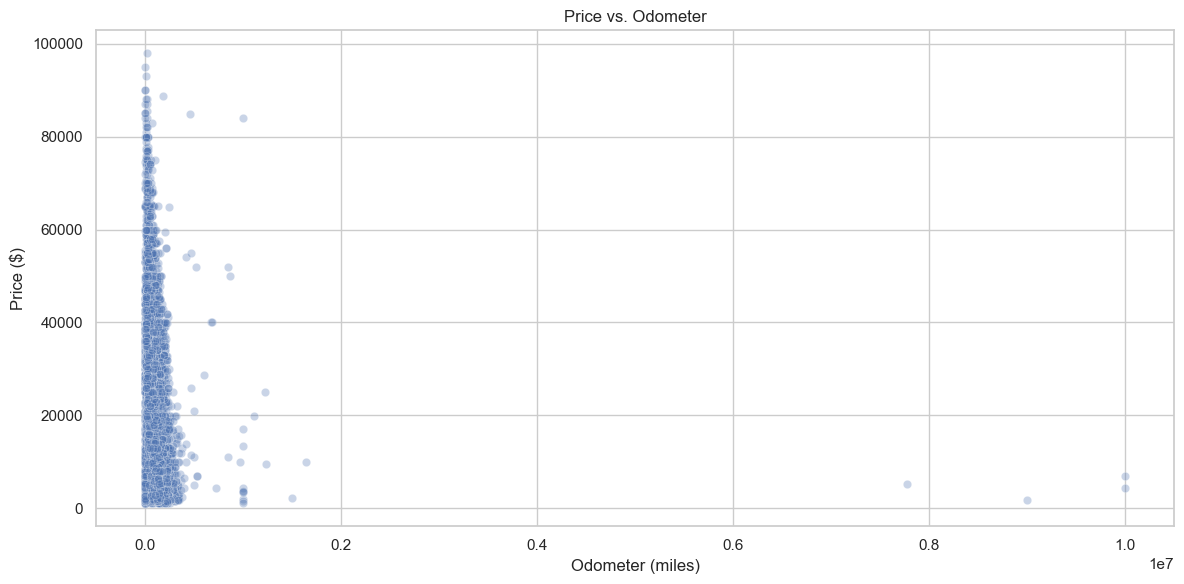

In [17]:
df_odo = df_filtered[df_filtered['odometer'].notnull()]
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_odo.sample(10000), x='odometer', y='price', alpha=0.3)
plt.title('Price vs. Odometer')
plt.xlabel('Odometer (miles)')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()

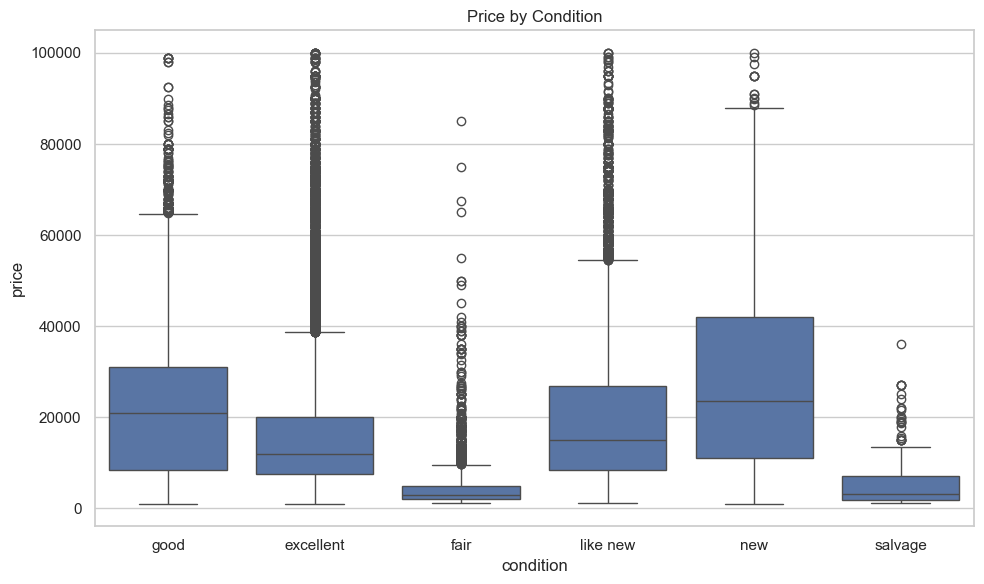

In [18]:
# Boxplot by Condition
df_condition = df_filtered[df_filtered['condition'].notnull()]
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_condition, x='condition', y='price')
plt.title('Price by Condition')
plt.tight_layout()
plt.show()

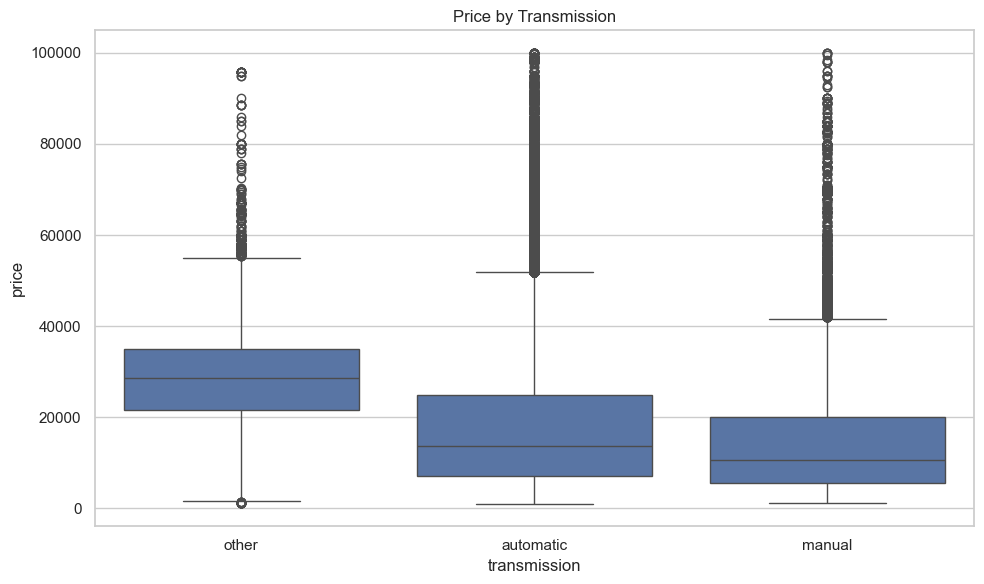

In [19]:
# Boxplot by Transmission
df_trans = df_filtered[df_filtered['transmission'].notnull()]
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_trans, x='transmission', y='price')
plt.title('Price by Transmission')
plt.tight_layout()
plt.show()

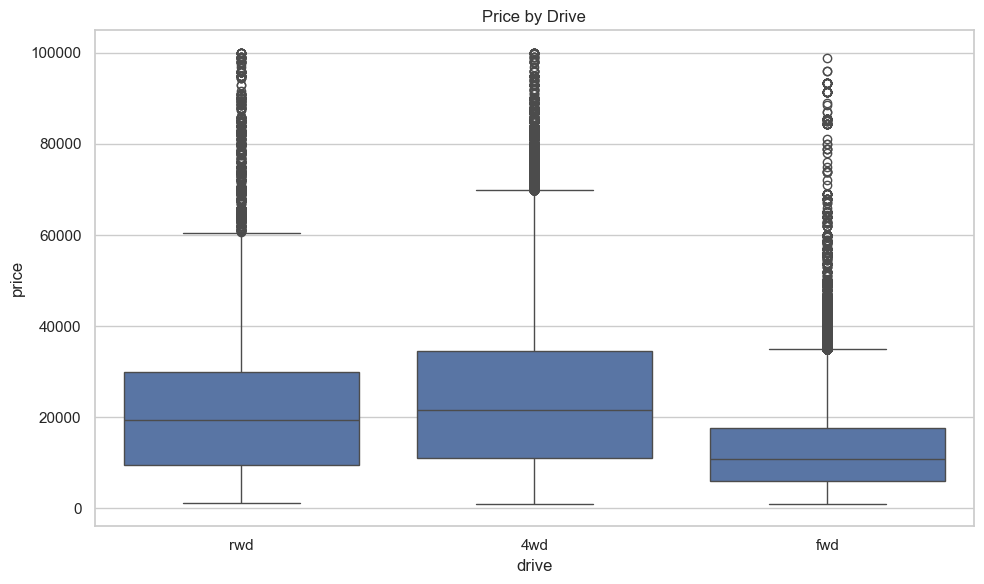

In [20]:
# Boxplot by Drive
df_drive = df_filtered[df_filtered['drive'].notnull()]
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_drive, x='drive', y='price')
plt.title('Price by Drive')
plt.tight_layout()
plt.show()

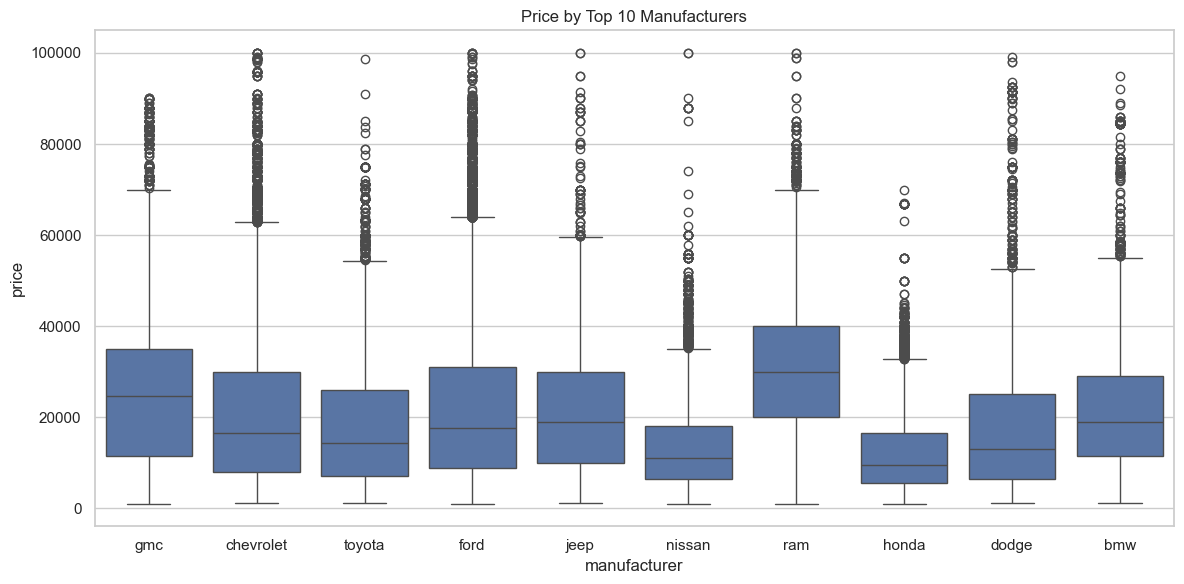

In [21]:
# Boxplot by Top Manufacturers
top_makes = df_filtered['manufacturer'].value_counts().nlargest(10).index
df_makes = df_filtered[df_filtered['manufacturer'].isin(top_makes)]
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_makes, x='manufacturer', y='price')
plt.title('Price by Top 10 Manufacturers')
plt.tight_layout()
plt.show()

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [22]:
df_clean = df_filtered.copy()
df_clean = df_clean[df_clean['price'].notnull() & df_clean['year'].notnull()]
import datetime
current_year = datetime.datetime.now().year
df_clean['car_age'] = current_year - df_clean['year']
df_clean = df_clean[df_clean['odometer'].notnull() & df_clean['manufacturer'].notnull() &
                     df_clean['condition'].notnull() & df_clean['fuel'].notnull() &
                     df_clean['transmission'].notnull() & df_clean['drive'].notnull()]
df_clean[['price', 'car_age', 'odometer', 'manufacturer', 'condition']].head()

,price,car_age,odometer,manufacturer,condition
31,15000,12.0,128000.0,ford,excellent
32,27990,13.0,68696.0,gmc,good
33,34590,9.0,29499.0,chevrolet,good
34,35000,6.0,43000.0,toyota,excellent
35,29990,9.0,17302.0,chevrolet,good


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

features = ['car_age', 'odometer', 'manufacturer', 'condition', 'fuel', 'transmission', 'drive']
target = 'price'
df_encoded = pd.get_dummies(df_clean[features], drop_first=True)
X = df_encoded
y = df_clean[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
(lr_mae, lr_rmse)

(6459.293350488681, np.float64(9184.145677614517))

In [25]:
# Decision Tree Regressor
dt = DecisionTreeRegressor(max_depth=10, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
(dt_mae, dt_rmse)

(4118.755470221459, np.float64(6383.540037653991))

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [26]:
importances = dt.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
importance_df.head(10)

,Feature,Importance
0,car_age,0.539465
54,drive_fwd,0.167496
1,odometer,0.144932
49,fuel_gas,0.050689
44,condition_good,0.016235
53,transmission_other,0.010973
51,fuel_other,0.008128
38,manufacturer_subaru,0.007024
55,drive_rwd,0.006423
8,manufacturer_chevrolet,0.005421


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

This report is intended for used car dealers who want to better understand what makes a used car more or less valuable in the market. After analyzing a dataset of over 400,000 used cars using the CRISP-DM framework, we built predictive models and extracted insights to guide inventory and pricing strategies.

Below is a summary of our key findings and business recommendations:

---

### 📌 Summary of Findings

- **Newer cars (lower car age)** are consistently valued higher.
- **Low mileage (odometer reading)** is strongly correlated with higher prices.
- **Drive type matters** — vehicles with 4WD or FWD tend to have higher price ranges.
- **Condition is crucial** — cars marked as “excellent” or “like new” significantly outperform “fair” or “salvage” vehicles.
- **Manufacturer has limited impact**, though some brands (e.g., Toyota, GMC, RAM) show stronger value retention.
- Our best predictive model was a **Decision Tree Regressor**, which showed strong performance with an RMSE of ~$6,384.

---

### 💼 Business Recommendations

1. **Prioritize newer inventory** — focus on acquiring cars under 10 years old.
2. **Avoid high-mileage vehicles** — prefer listings with under 120,000 miles.
3. **Stock more 4WD and FWD vehicles**, especially for SUV and truck categories.
4. **Ensure accurate and consistent condition reporting** — high-condition ratings drive better pricing.
5. **Brand less important than condition/mileage** — don’t overpay just for a name badge.

---

By focusing on these characteristics, dealerships can better align their inventory with what the market values most — resulting in higher margins and faster sales turnover.